In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

main_data = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col='Country/Region')

In [4]:
main_data.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.0000,65.0000,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
Andorra,NaN,42.5063,1.5218,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
Angola,NaN,-11.2027,17.8739,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


# Реализация основных функций

In [9]:
def plot_(data, grid, country, flag='linear'):
    plt.figure(figsize=(12,6))
    
    #make title and label axis
    title = str()
    ylab = str()
    xlab = 'Номер дня'
    if flag == 'linear':
        title = f'Зависимость количества заболевших в {country} от времени'
        ylab = 'Количество заболевших'
    if flag == 'log':
        title = f'Зависимость логарифма количества заболевших в {country} от времени'
        ylab = '$\ln$(Количество заболевших)'
    
    plt.plot(
        grid,
        data,
        'bo'
    )
    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontsize=15)
    plt.grid()
    plt.show()

In [10]:
def precision(log_data, new_grid):
    size = new_grid.size
    ans = np.array([])
    for i in range(log_data.size):
        log_data_i = log_data[i:]
        f_cash = np.polyfit(new_grid, log_data, 1)
        f = sp.poly1d(f_cash)
        predict = np.exp(f(size - i))
        real_data = np.exp(log_data[size - i - 1])
        ans = np.append(ans, abs(predict - real_data) / real_data)
        
    std = np.std(ans)
    avg = ans.mean()
    
    return avg, std

In [11]:
def fit(log_data, new_grid, country, flag='predict'):
    plt.figure(figsize=(12,6))

    #plot points
    plt.plot(
        new_grid,
        log_data,
        'bo'
    )

    f_cash = np.polyfit(new_grid, log_data, 1)
    f = sp.poly1d(f_cash)
    print('Параметры линейной зависимости:')
    print(f)
    
    #predict 
    if flag == 'predict':
        predict = int(np.exp(f(new_grid.size + 1)))
        avg_prec, std = precision(log_data, new_grid)
        print(f'Количество заболевших на 30 марта: {predict}')
        print(f'Средняя относительная ошибка = {int(avg_prec * 1000) / 10}%')
        print(f'Текущая погрешность = {int(avg_prec * predict)}')
    
    plt.plot(
        new_grid,
        f(new_grid)
    )
    
    
    title = f'Зависимость логарифма количества заболевших в {country} от времени'
    ylab = '$\ln$(Количество заболевших)'
    xlab = 'Номер дня'
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title, fontsize=15)
    plt.grid()
    plt.show()

## Анализ ситуации в России
- Данные на 29 марта.

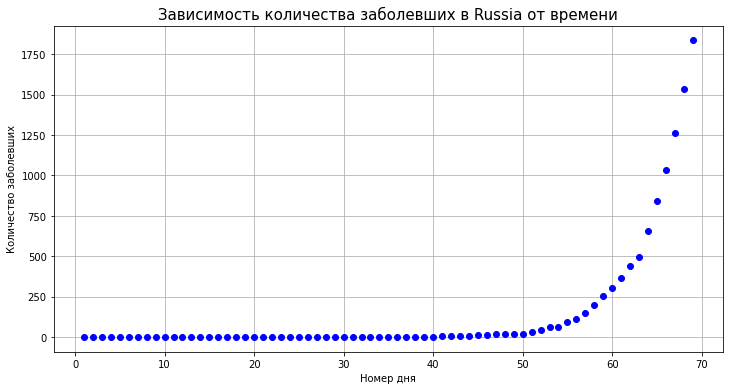

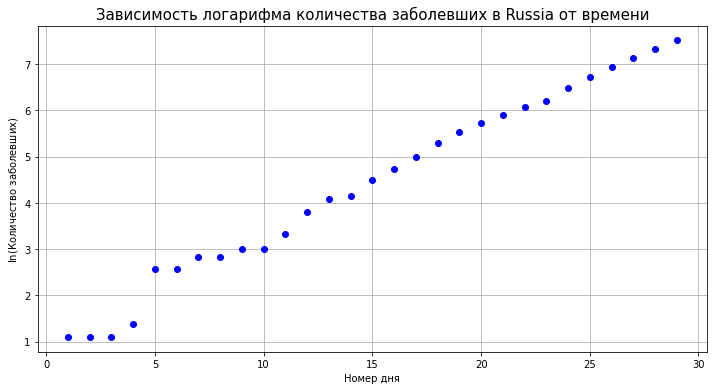

Параметры линейной зависимости:
 
0.2194 x + 3.646
Количество заболевших на 30 марта: 2478
Средняя относительная ошибка = 5.3%
Текущая погрешность = 132


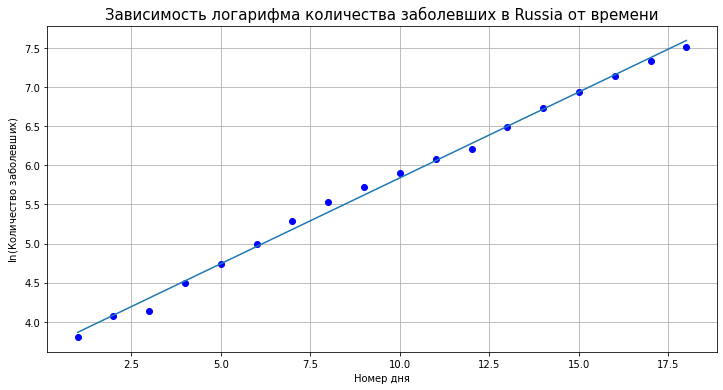

In [26]:
#prepare dataset
data_ = np.array(main_data.loc['Russia'])[3::]
data_ = np.append(data_, 1836)
grid = np.arange(1, data_.size + 1, 1)
plot_(data_, grid, 'Russia')

#prepare dataset
data_ = data_[data_ != 0]
data_ = data_[data_ != 2]

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
plot_(log_data, new_grid, 'Russia', 'log')

#make log scale
log_data = log_data[log_data > 3.5]
new_grid = np.arange(1, log_data.size + 1, 1)

fit(log_data, new_grid, 'Russia')

# Дополнение

## Анализ США

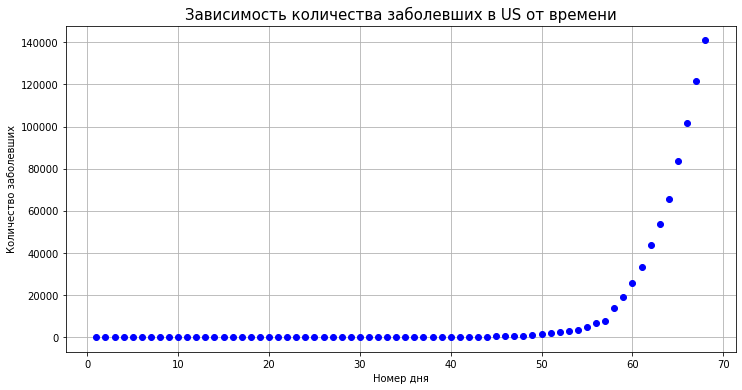

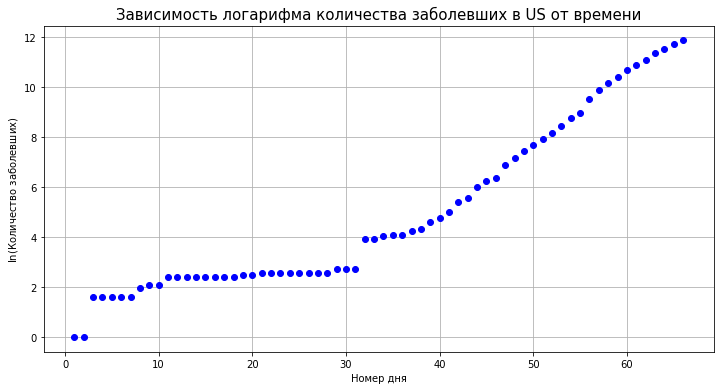

Параметры линейной зависимости:
 
0.2834 x + 3.978
Количество заболевших на 30 марта: 262801
Средняя относительная ошибка = 9.9%
Текущая погрешность = 26116


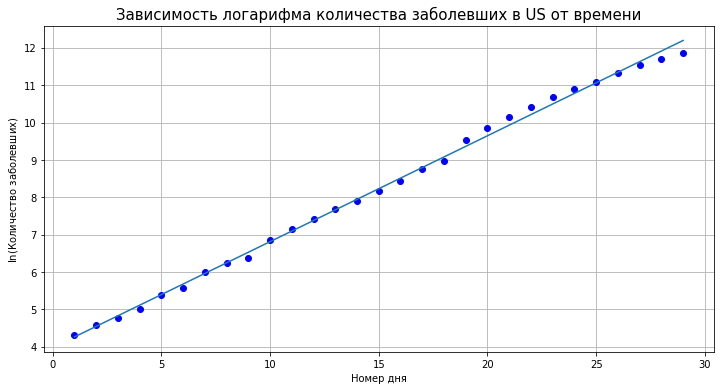

In [18]:
#prepare dataset
data_ = np.array(main_data.loc['US'])[3::]
grid = np.arange(1, data_.size + 1, 1)
plot_(data_, grid, 'US')

#prepare dataset
data_ = data_[data_ != 0]
data_ = data_[data_ != 2]

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
plot_(log_data, new_grid, 'US', flag='log')


log_data = log_data[log_data > 4.25]
new_grid = np.arange(1, log_data.size + 1, 1)

fit(log_data, new_grid, 'US')

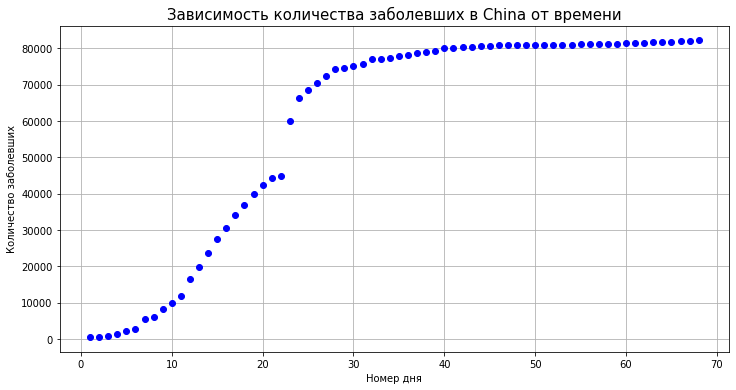

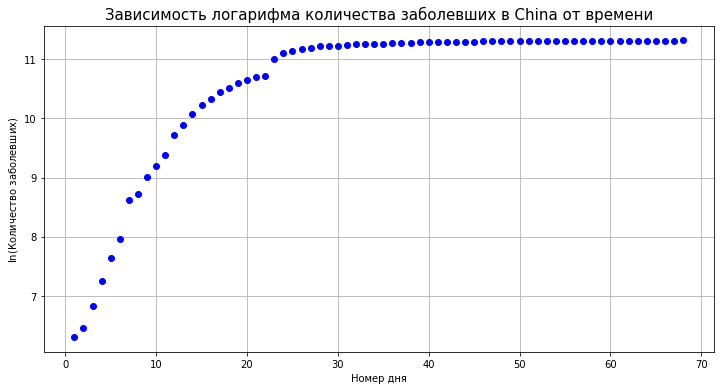

Параметры линейной зависимости:
 
0.3149 x + 6.024


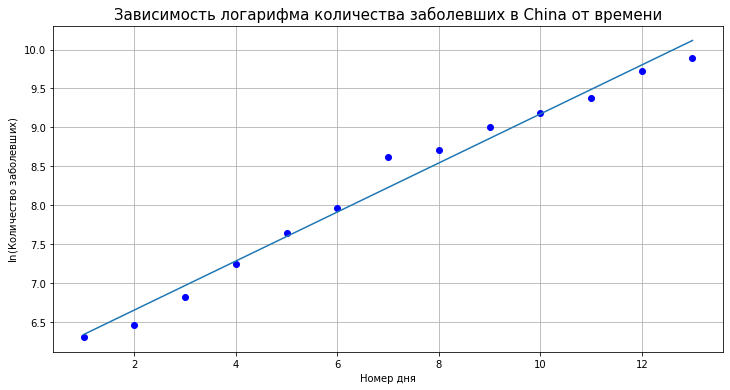

In [24]:
#prepare dataset
data_ = np.array(main_data.loc['China'])[...,3:].sum(axis=0)
grid = np.arange(1, data_.size + 1, 1)
plot_(data_, grid, 'China')

#make log scale
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
plot_(log_data, new_grid, 'China', 'log')

log_data = log_data[log_data < 10]
new_grid = np.arange(1, log_data.size + 1, 1)

fit(log_data, new_grid, 'China', 'no_predict')

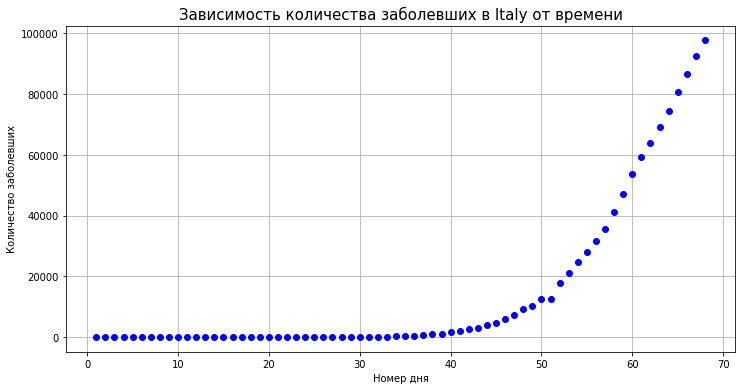

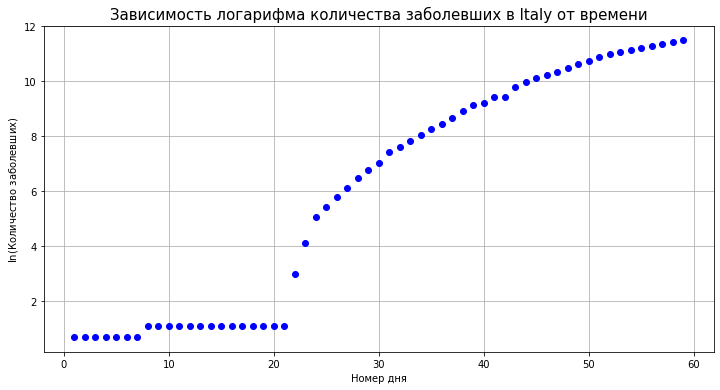

Параметры линейной зависимости:
 
0.2164 x + 6.198


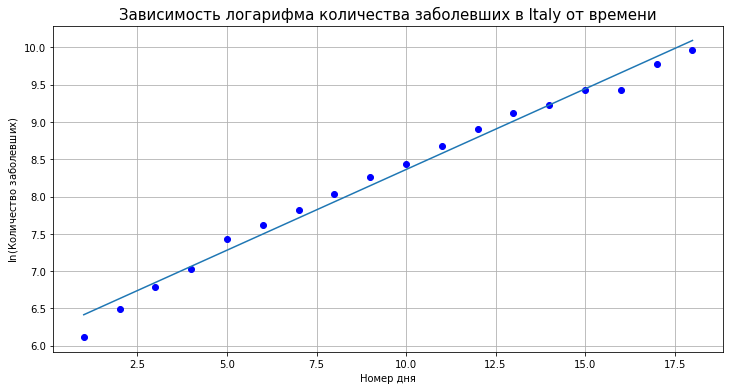

In [23]:
#prepare dataset
data_ = np.array(main_data.loc['Italy'])[3::]
grid = np.arange(1, data_.size + 1, 1)
plot_(data_, grid, 'Italy')

#make log scale
data_ = data_[data_ != 0]
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
plot_(log_data, new_grid, 'Italy', 'log')

log_data = log_data[log_data > 6]
log_data = log_data[log_data < 10]
new_grid = np.arange(1, log_data.size + 1, 1)

fit(log_data, new_grid, 'Italy', 'no predict')

### Ситуация в мире

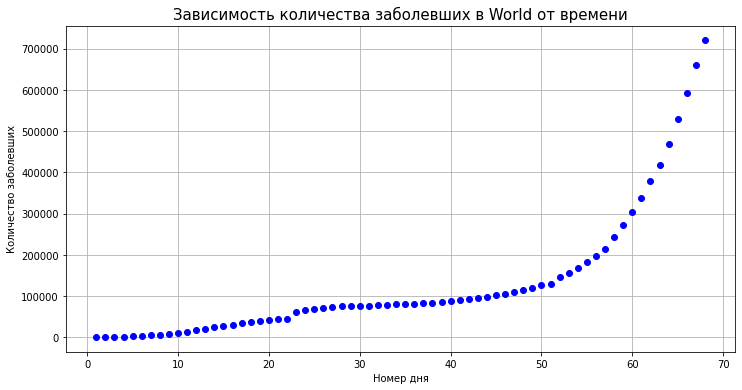

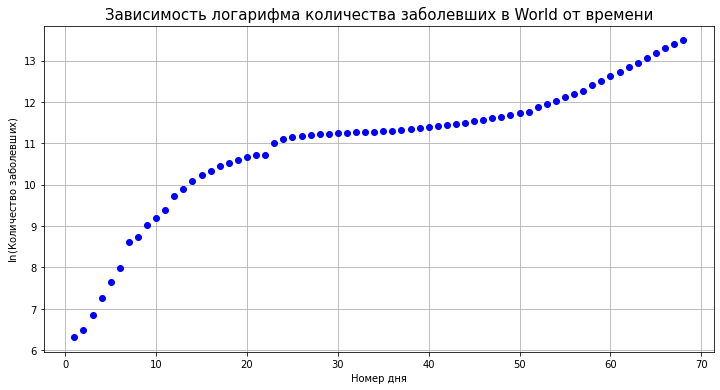

Параметры линейной зависимости:
 
0.1058 x + 11.79


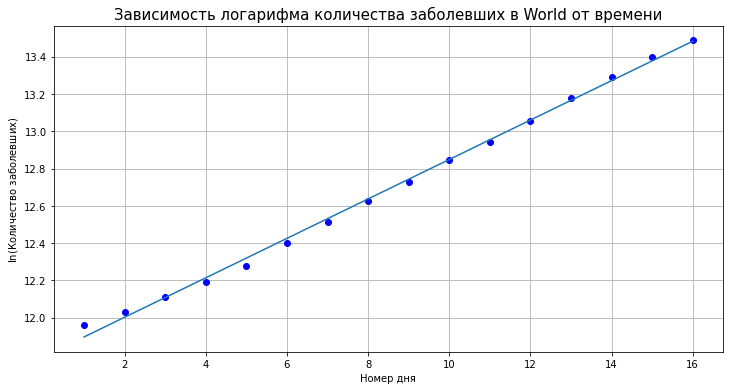

In [22]:
#prepare dataset
data_ = np.array(main_data)[...,3:].sum(axis=0)
grid = np.arange(1, data_.size + 1, 1)
plot_(data_, grid, 'World')

#make log scale
data_ = data_[data_ != 0]
log_data = np.log(list(data_))
new_grid = np.arange(1, log_data.size + 1, 1)

#plot log graph
plot_(log_data, new_grid, 'World', 'log')

log_data = log_data[log_data > 11.9]
new_grid = np.arange(1, log_data.size + 1, 1)

fit(log_data, new_grid, 'World', 'no predict')